In [ ]:
#dfbook - main dataframe
#dfboo1 - subset of main dataframe
#dfRanking - rank and title
#rank_df - with rank and rest of the columns - merged dataframe (dfbook and dfRanking)
#merged_df - no need to use it
#dfbest - with rows from dfbook with Best Seller condition -- no need to use it


In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [482]:
dfbook = pd.read_csv('AmazonBooks.csv')

In [472]:
dfbook1 = pd.read_csv('AmazonBooks.csv')

In [318]:
#dfbook[dfbook['Title'] == "Greenlights"]

,Title,Price,Star,Rating,Genre,Category,Publisher,Badge,Url
723,Greenlights,$30.00,4.7 out of 5 stars,821,in Rich and Famous Biographies,Biography,NaN,Amazon Charts,NaN


In [473]:
dfRanking = pd.read_csv('BookRanking.csv')

In [474]:
dfRanking.head()

,Title,Sales Rank: Current
0,Greenlights,1
1,The Deep End (Diary of a Wimpy Kid Book 15),2
2,Tasha's Cauldron of Everything (D&D Rules Expa...,3
3,A Promised Land,4
4,Modern Comfort Food: A Barefoot Contessa Cookbook,5


In [300]:
dfRanking.columns

Index(['Title', 'Sales Rank: Current'], dtype='object')

In [475]:
dfRanking.rename(columns = {'Sales Rank: Current':'Rank'}, inplace = True) 
dfRanking.head()

,Title,Rank
0,Greenlights,1
1,The Deep End (Diary of a Wimpy Kid Book 15),2
2,Tasha's Cauldron of Everything (D&D Rules Expa...,3
3,A Promised Land,4
4,Modern Comfort Food: A Barefoot Contessa Cookbook,5


In [302]:
dfbook.head()

,Title,Price,Star,Rating,Genre,Category,Publisher,Badge,Url
0,Why Black Lives Matter: African American Thriv...,$28.00,Empty,Empty,Empty,NaN,NaN,Empty,NaN
1,Joy The Baker,$12.99,Empty,Empty,Empty,NaN,NaN,Empty,NaN
2,Soulmates,$9.00,Empty,Empty,Empty,NaN,NaN,Empty,NaN
3,NYT Explorer. 100 Trips Around the World,$36.00,Empty,Empty,Empty,NaN,NaN,Empty,NaN
4,Face to Face: The Photographs of Camilla McGrath,$54.41,Empty,Empty,Empty,NaN,NaN,Empty,NaN


In [303]:
dfbook.shape

(1201, 9)

In [304]:
dfbook.columns

Index(['Title', 'Price', 'Star', 'Rating', 'Genre', 'Category', 'Publisher',
       'Badge', 'Url'],
      dtype='object')

In [481]:
#Percentage of missing values in each column of the DataFrame
missing_values = dfbook.isnull().sum()* 100 /len(dfbook)
missing_values.sort_values(inplace=True)
missing_values

Title        0.083264
Price        0.083264
Star         0.083264
Rating       0.083264
Genre        0.083264
Badge        0.083264
Category    88.093256
dtype: float64

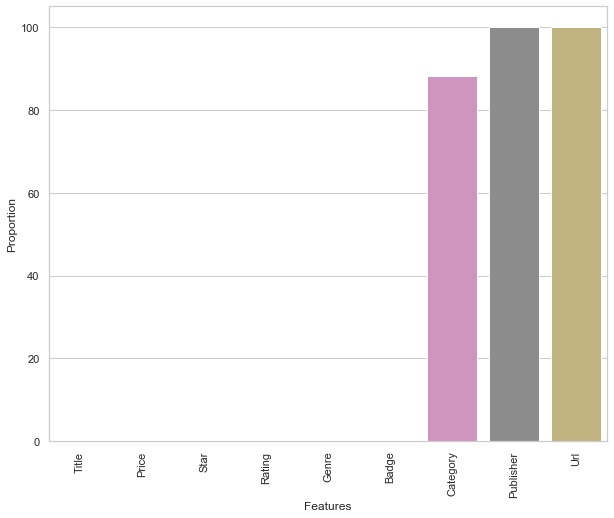

In [479]:
#Visualize missing values in a barplot
missing_vals = missing_values.to_frame()
missing_vals.columns=['count']
missing_vals.index.names=['Names']
missing_vals['Names']=missing_vals.index
plt.figure(figsize = (10,8))
sns.set(style="whitegrid", color_codes=True)
ax = sns.barplot(x = 'Names', y = 'count', data=missing_vals)
ax.set(xlabel='Features', ylabel='Proportion')
plt.xticks(rotation = 90)
plt.show()

In [483]:
# dropping URL and Publisher columns 
dfbook.drop(["Url", "Publisher"], axis = 1, inplace = True) 


In [283]:
# Create a new dataframe with best seller badge

#dfbest = dfbook[dfbook['Badge'] == "Best Seller"]

In [320]:
# Check length and head of this dfbest

#dfbest.head()

In [321]:
#len(dfbest)

In [484]:
boolean_condition = dfbook.Badge == "Empty"
column_name = "Badge"
new_value = "NotBestSeller"

dfbook.loc[boolean_condition, column_name] = new_value

In [485]:
boolean_condition = dfbook.Badge == "Holiday Gift Guide"
column_name = "Badge"
new_value = "NotBestSeller"

dfbook.loc[boolean_condition, column_name] = new_value

In [486]:
boolean_condition = dfbook.Badge == "Kids Gift Guide"
column_name = "Badge"
new_value = "NotBestSeller"

dfbook.loc[boolean_condition, column_name] = new_value

In [487]:
boolean_condition = dfbook.Badge == "Amazon Charts"
column_name = "Badge"
new_value = "Best Seller"

dfbook.loc[boolean_condition, column_name] = new_value

In [326]:
dfbook[dfbook['Title'] == "Greenlights"]

,Title,Price,Star,Rating,Genre,Category,Badge
723,Greenlights,$30.00,4.7 out of 5 stars,821,in Rich and Famous Biographies,Biography,Best Seller


In [358]:
dfbook['Badge'].value_counts()

NotBestSeller    1050
Best Seller       150
Name: Badge, dtype: int64

In [328]:
# Create a new dataframe with best seller badge

dfbest = dfbook[dfbook['Badge'] == "Best Seller"]

In [329]:
dfbest.head()

,Title,Price,Star,Rating,Genre,Category,Badge
12,The Immunity Fix: Strengthen Your Immune Syste...,$34.07,Empty,Empty,in Biochemistry,Science,Best Seller
139,How May I Offend You Today?: Rants and Revelat...,$16.99,5.0 out of 5 stars,133,in Religious Humor,NaN,Best Seller
154,LineKid's ABCs: A Kid's Guide to the Work of a...,$14.85,5.0 out of 5 stars,46,in Electric Energy,NaN,Best Seller
162,KATE (Madison Kate Book 4),$0.00,5.0 out of 5 stars,36,in Romantic Suspense,NaN,Best Seller
200,Down Home Money: A Simple Approach to Financia...,$0.99,5.0 out of 5 stars,15,in Financial Engineering,NaN,Best Seller


In [330]:
dfbest[dfbest['Title'] == "Greenlights"]

,Title,Price,Star,Rating,Genre,Category,Badge
723,Greenlights,$30.00,4.7 out of 5 stars,821,in Rich and Famous Biographies,Biography,Best Seller


### Any best seller with no reviews and no ratings

In [331]:
# Any best seller with no reviews and no ratings -- use for analysis

name = dfbest[(dfbest["Star"] == "Empty") & (dfbest["Rating"] == "Empty")]
name['Title']

12    The Immunity Fix: Strengthen Your Immune Syste...
Name: Title, dtype: object

In [333]:
dfbest.columns

Index(['Title', 'Price', 'Star', 'Rating', 'Genre', 'Category', 'Badge'], dtype='object')

In [332]:
dfRanking.columns

Index(['Title', 'Rank'], dtype='object')

In [334]:
dfRanking[dfRanking['Title'] == "Greenlights"]

,Title,Rank
0,Greenlights,1


In [335]:
merged_best = pd.merge(left=dfbest, right=dfRanking, how='left',left_on='Title', right_on='Title')
merged_best.head()

,Title,Price,Star,Rating,Genre,Category,Badge,Rank
0,The Immunity Fix: Strengthen Your Immune Syste...,$34.07,Empty,Empty,in Biochemistry,Science,Best Seller,1435.0
1,How May I Offend You Today?: Rants and Revelat...,$16.99,5.0 out of 5 stars,133,in Religious Humor,NaN,Best Seller,NaN
2,LineKid's ABCs: A Kid's Guide to the Work of a...,$14.85,5.0 out of 5 stars,46,in Electric Energy,NaN,Best Seller,NaN
3,KATE (Madison Kate Book 4),$0.00,5.0 out of 5 stars,36,in Romantic Suspense,NaN,Best Seller,NaN
4,Down Home Money: A Simple Approach to Financia...,$0.99,5.0 out of 5 stars,15,in Financial Engineering,NaN,Best Seller,NaN


In [336]:
merged_best[merged_best['Title'] == "Greenlights"]

,Title,Price,Star,Rating,Genre,Category,Badge,Rank
81,Greenlights,$30.00,4.7 out of 5 stars,821,in Rich and Famous Biographies,Biography,Best Seller,1.0


In [345]:
#merged_best["Rank"] = pd.to_numeric(merged_best["Rank"])

merged_best["Rank"] = merged_best["Rank"].astype(str) 

In [349]:
merged_best[merged_best['Title'] == "Greenlights"]

,Title,Price,Star,Rating,Genre,Category,Badge,Rank
81,Greenlights,$30.00,4.7 out of 5 stars,821,in Rich and Famous Biographies,Biography,Best Seller,1


In [347]:
merged_best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 8 columns):
Title       152 non-null object
Price       152 non-null object
Star        152 non-null object
Rating      152 non-null object
Genre       152 non-null object
Category    72 non-null object
Badge       152 non-null object
Rank        152 non-null object
dtypes: object(8)
memory usage: 10.7+ KB


In [348]:
# Split Star column to extract Number of Star
merged_best["Rank"] = merged_best["Rank"].str.split('.').str[0]
merged_best.head(2)

,Title,Price,Star,Rating,Genre,Category,Badge,Rank
0,The Immunity Fix: Strengthen Your Immune Syste...,$34.07,Empty,Empty,in Biochemistry,Science,Best Seller,1435
1,How May I Offend You Today?: Rants and Revelat...,$16.99,5.0 out of 5 stars,133,in Religious Humor,NaN,Best Seller,nan


In [353]:
merged_best[merged_best["Rank"] == 'nan']



,Title,Price,Star,Rating,Genre,Category,Badge,Rank
1,How May I Offend You Today?: Rants and Revelat...,$16.99,5.0 out of 5 stars,133,in Religious Humor,NaN,Best Seller,nan
2,LineKid's ABCs: A Kid's Guide to the Work of a...,$14.85,5.0 out of 5 stars,46,in Electric Energy,NaN,Best Seller,nan
3,KATE (Madison Kate Book 4),$0.00,5.0 out of 5 stars,36,in Romantic Suspense,NaN,Best Seller,nan
4,Down Home Money: A Simple Approach to Financia...,$0.99,5.0 out of 5 stars,15,in Financial Engineering,NaN,Best Seller,nan
5,"The Rack We Built: The Good, The Bad, and the ...",$0.99,5.0 out of 5 stars,15,in Business Planning & Forecasting,NaN,Best Seller,nan
6,Chicago Protests: A Joyful Revolution,$27.00,5.0 out of 5 stars,13,in Photo Essays,NaN,Best Seller,nan
8,A World Beneath the Sands: The Golden Age of E...,$27.00,5.0 out of 5 stars,8,in Archaeology,NaN,Best Seller,nan
9,Geopolitical Alpha: An Investment Framework fo...,$28.45,5.0 out of 5 stars,7,in International Business,NaN,Best Seller,nan
11,The Art of NASA: The Illustrations That Sold t...,$33.01,5.0 out of 5 stars,5,in Aircraft Design & Construction,NaN,Best Seller,nan
12,Rattan: A World of Elegance and Charm,$49.49,5.0 out of 5 stars,4,in Furniture Design,NaN,Best Seller,nan


In [354]:
merged_best["Rank"] = merged_best["Rank"].replace('nan', '0', regex=True)

In [355]:
merged_best["Rank"] = merged_best["Rank"].astype(int) 


In [357]:
# # Sort new merged df on Rank column

# rank_df = merged_best.sort_values(by=['Rank'], ascending=True)
# rank_df.head()

# drop rows where Star and Rating has value = "Empty"
rank_df = rank_df.drop(rank_df[rank_df['Rank']== 0].index)
rank_df.head()

,Title,Price,Star,Rating,Genre,Category,Badge,Rank
81,Greenlights,$30.00,4.7 out of 5 stars,821,in Rich and Famous Biographies,Biography,Best Seller,1
34,The Deep End (Diary of a Wimpy Kid Book 15),$9.46,4.9 out of 5 stars,784,Children's Humor,Children,Best Seller,2
53,Modern Comfort Food: A Barefoot Contessa Cookbook,$21.00,4.8 out of 5 stars,"1,317",in Comfort Food Cooking,Food,Best Seller,5
77,Untamed,$27.00,4.7 out of 5 stars,"21,697",in Women Biographies,Biography,Best Seller,13
142,The Sentinel: A Jack Reacher Novel,$14.99,4.1 out of 5 stars,703,Crime Action & Adventure,Thriller & Suspense,Best Seller,18


In [ ]:
# If Star and Rating values are "Empty" string, Badge is New Release

# for i in len(dfbook):
#     if dfbook['Star'] == "Empty" &
# dfbook['Star'].loc[dfbook['Rating']==""] = train_data['Name'].loc[train_data['Type']==1].fillna('Puppy')

In [360]:
rank_df["Badge"].value_counts()

Best Seller    72
Name: Badge, dtype: int64

In [490]:
# Replace correct Category
dfbook['Category'].replace({'Thr':'Thriller & Suspense','Thrillers':'Thriller & Suspense'},inplace=True)


In [491]:
# Copy to new dataframe to maintain the cleaned dfbook
dfbook1 = dfbook.copy()

In [528]:
dfbook1.dtypes

Title         object
Price         object
Star          object
Rating        object
Genre         object
Category      object
Badge         object
Stars        float64
Starbin     category
dtype: object

In [533]:
dfbook1['Rating'].replace(',', '',regex=True, inplace=True)


In [535]:
dfbook1['Rating']=dfbook1['Rating'].apply(pd.to_numeric,errors='coerce')

In [536]:
dfbook1.dtypes

Title         object
Price         object
Star          object
Rating       float64
Genre         object
Category      object
Badge         object
Stars        float64
Starbin     category
dtype: object

In [492]:
dfbook1["Badge"].value_counts()

NotBestSeller    1050
Best Seller       150
Name: Badge, dtype: int64

In [525]:
dfbook1['Price'].head()

138    $21.00 
139    $16.99 
140    $23.77 
141    $17.09 
142    $20.47 
Name: Price, dtype: object

In [526]:
# Remove $ sign from each value in Price column
dfbook1['Price'] = dfbook1['Price'].astype(str).str.replace('$', '')


In [546]:
#dfbook1['Price'] = dfbook1['Price'].fillna('0')
dfbook1['Price'] = dfbook1['Price'].astype(str).str.replace('nan', '0')



In [547]:

dfbook1['Price'] = pd.to_numeric(dfbook1['Price'], downcast="float")


In [527]:
dfbook1['Price'].head()

138    21.00 
139    16.99 
140    23.77 
141    17.09 
142    20.47 
Name: Price, dtype: object

In [176]:
# Write code chunk to create category column
#dfbook.Genre.head()

In [493]:
#Insert new Field Category Using Genre **********************************
#Top Rank Cateogries Only
dfbook1['Category'].value_counts()

Food                   31
Children               24
Fantasy                22
Thriller & Suspense    21
Reference              16
Biography              13
Travel & Places         7
Politics                7
Science                 2
Name: Category, dtype: int64

In [495]:
dfbook1['Category'].unique()

array([nan, 'Science', 'Food', 'Travel & Places', 'Children', 'Reference',
       'Fantasy', 'Politics', 'Biography', 'Thriller & Suspense'],
      dtype=object)

In [180]:
len(dfbook['Star'])

1201

In [496]:
# drop rows where Star and Rating has value = "Empty"
dfbook1 = dfbook1.drop(dfbook1[dfbook1['Star']=="Empty"].index)


In [361]:
rank_df['Star'].head()

81     4.7 out of 5 stars
34     4.9 out of 5 stars
53     4.8 out of 5 stars
77     4.7 out of 5 stars
142    4.1 out of 5 stars
Name: Star, dtype: object

In [498]:
dfbook1['Star'].head()

138    5.0 out of 5 stars
139    5.0 out of 5 stars
140    5.0 out of 5 stars
141    5.0 out of 5 stars
142    5.0 out of 5 stars
Name: Star, dtype: object

In [499]:
dfbook1['Star'] = dfbook1['Star'].replace(np.nan, '3.9 out of 5 stars', regex=True)

In [362]:
# Split Star column to extract Number of Star
rank_df['Stars'] = rank_df['Star'].str.split(' ').str[0]

In [ ]:
# Split Star column to extract Number of Star
#rank_df['Stars'] = rank_df['Star'].str.split(' ').str[0]

In [503]:
# Split Star column to extract Number of Star
dfbook1['Stars'] = dfbook1['Star'].str.split(' ').str[0]

In [370]:
# drop rows where Star and Rating has value = "Empty"
#dfbook1 = dfbook1.drop(dfbook[dfbook['Star']=="Empty"].index)


In [372]:
rank_df.head()

,Title,Price,Star,Rating,Genre,Category,Badge,Rank,Stars
81,Greenlights,$30.00,4.7 out of 5 stars,821,in Rich and Famous Biographies,Biography,Best Seller,1,4.7
34,The Deep End (Diary of a Wimpy Kid Book 15),$9.46,4.9 out of 5 stars,784,Children's Humor,Children,Best Seller,2,4.9
53,Modern Comfort Food: A Barefoot Contessa Cookbook,$21.00,4.8 out of 5 stars,"1,317",in Comfort Food Cooking,Food,Best Seller,5,4.8
77,Untamed,$27.00,4.7 out of 5 stars,"21,697",in Women Biographies,Biography,Best Seller,13,4.7
142,The Sentinel: A Jack Reacher Novel,$14.99,4.1 out of 5 stars,703,Crime Action & Adventure,Thriller & Suspense,Best Seller,18,4.1


In [504]:
dfbook1['Stars'].head()

138    5.0
139    5.0
140    5.0
141    5.0
142    5.0
Name: Stars, dtype: object

In [505]:
dfbook1.head()

,Title,Price,Star,Rating,Genre,Category,Badge,Stars
138,Dessert Person: Recipes and Guidance for Bakin...,$21.00,5.0 out of 5 stars,152,in Dessert Baking,Food,NotBestSeller,5.0
139,How May I Offend You Today?: Rants and Revelat...,$16.99,5.0 out of 5 stars,133,in Religious Humor,NaN,Best Seller,5.0
140,Harry Potter and the Sorcerer's Stone: MinaLim...,$23.77,5.0 out of 5 stars,131,in Travel Photography,Travel & Places,NotBestSeller,5.0
141,Honest Advent: Awakening to the Wonder of God-...,$17.09,5.0 out of 5 stars,110,Empty,NaN,NotBestSeller,5.0
142,Clean Paleo One-Pot Meals: 100 Delicious Recip...,$20.47,5.0 out of 5 stars,107,Empty,NaN,NotBestSeller,5.0


In [506]:
dfbook1['Stars'].value_counts()

5.0    308
4.8    141
4.9    126
4.7    104
4.6     79
4.5     77
4.4     61
4.3     43
4.1     25
4.2     22
4.0     16
3.9     15
3.8     14
3.5      7
3.7      5
3.6      4
3.0      4
2.0      3
3.2      2
1.0      2
3.4      2
3.3      1
2.8      1
2.5      1
Name: Stars, dtype: int64

In [510]:
dfbook1.columns

Index(['Title', 'Price', 'Star', 'Rating', 'Genre', 'Category', 'Badge',
       'Stars'],
      dtype='object')

In [507]:
dfbook1["Stars"]= dfbook1["Stars"].astype(str).astype(float)


In [514]:
# Barplot

ratings_counts = dfbook1['Stars'].value_counts()
df = ratings_counts.rename_axis('Stars').reset_index(name = 'counts')
df

,Stars,counts
0,5.0,308
1,4.8,141
2,4.9,126
3,4.7,104
4,4.6,79
5,4.5,77
6,4.4,61
7,4.3,43
8,4.1,25
9,4.2,22


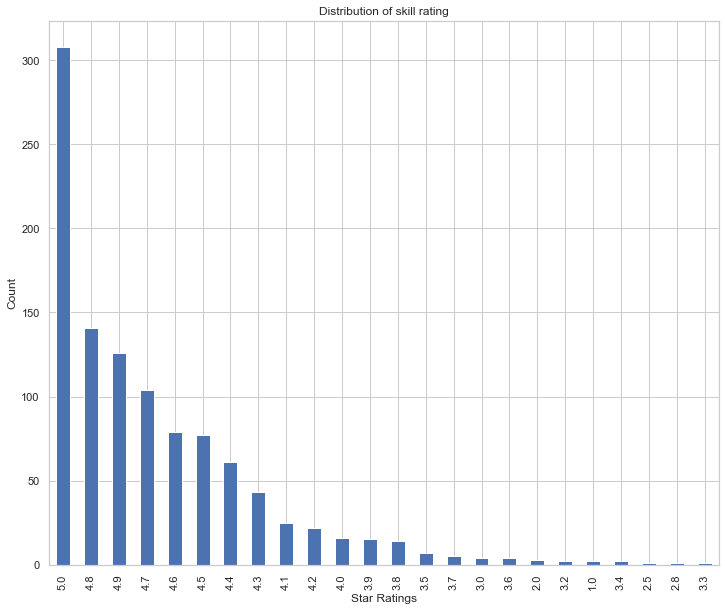

In [517]:
#Distribution of User Ratings
dfbook1['Stars'].value_counts().plot(kind = 'bar',figsize = (12,10))
plt.title("Distribution of skill rating")
plt.xlabel("Star Ratings")
plt.ylabel("Count")
plt.show()

An average rating of 5 is the most common rating in our last 30 days of data. Specifically, around 20% of books are rated with an average rating of 5. Second highest rating falls in a star rating of 4 followerd by 3.
#,around 75%, are rated within the range of 5.0 to 3.0.

In [518]:
bins = [-0.1, 0.9, 1.9, 2.9, 3.9, 4.9, 5.9]
names = ['0', '1', '2', '3', '4', '5']

dfbook1["Starbin"] = pd.cut(dfbook1['Stars'], bins, labels=names)
print(dfbook1.dtypes)

Title         object
Price         object
Star          object
Rating        object
Genre         object
Category      object
Badge         object
Stars        float64
Starbin     category
dtype: object


Text(0.5, 0, 'Star Rating')

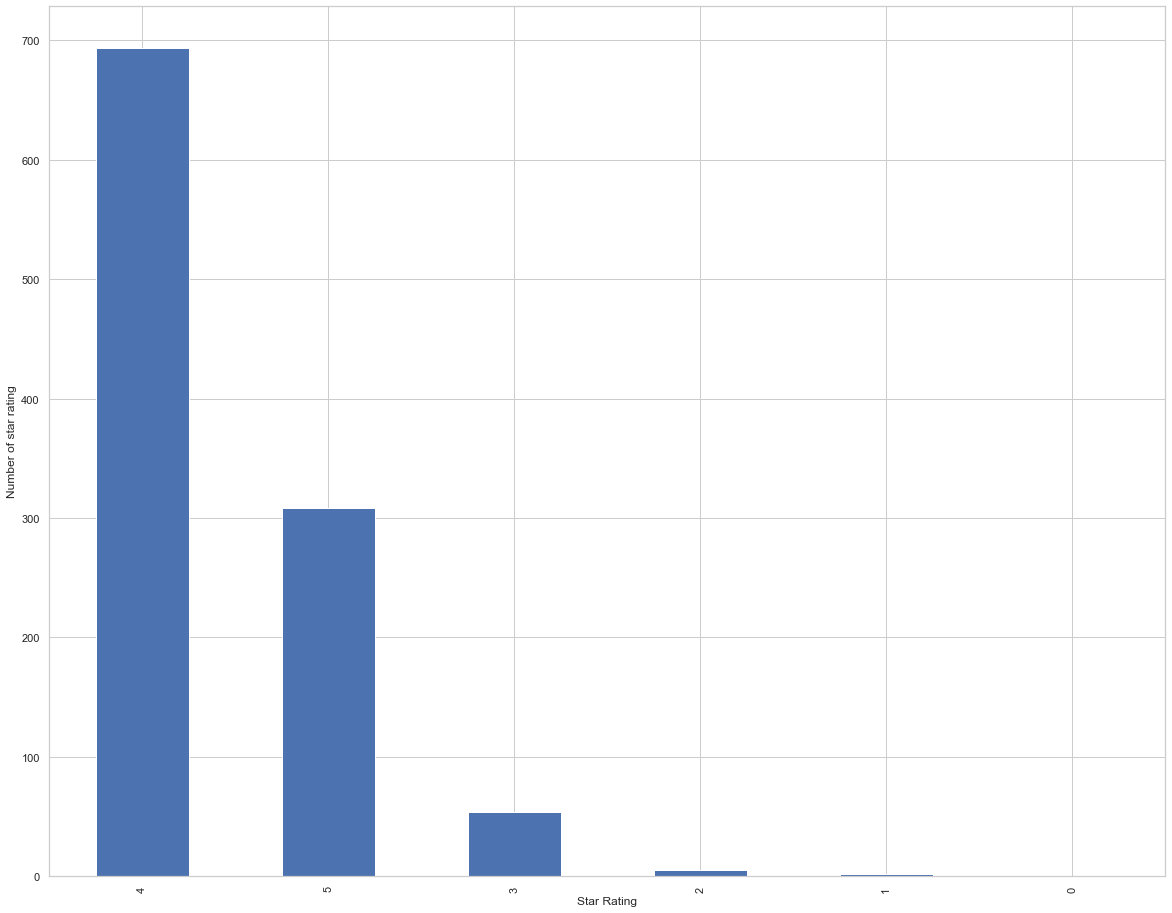

In [519]:
# bar

ax = dfbook1['Starbin'].value_counts().plot(kind='bar',figsize = (20,16)) 
ax.set_ylabel('Number of star rating')
ax.set_xlabel('Star Rating')

The above plot  by summarises all the ratings and finds by their total count. After binning, we can observe that most of the books rating falls in the range of 4 - 4.9. There are no books that got 0 star and very few that scores 1 or 2 star. 

In [520]:
# plot with percentage instead of count
count_value =  dfbook1['Starbin'].value_counts().to_frame()
count_value.columns=['count']
count_value.index.names=['Star Rating']
count_value["percent"] = count_value['count']/sum(count_value['count'])
count_value

,count,percent
Star Rating,,
4,694,0.652869
5,308,0.289746
3,54,0.050800
2,5,0.004704
1,2,0.001881
0,0,0.000000


In [521]:
count_value = count_value.sort_values(['percent']).reset_index()
#pd_df = pd_df.sort_values(['Count']).reset_index(drop=True)
count_value

,Star Rating,count,percent
0,0,0,0.000000
1,1,2,0.001881
2,2,5,0.004704
3,3,54,0.050800
4,5,308,0.289746
5,4,694,0.652869


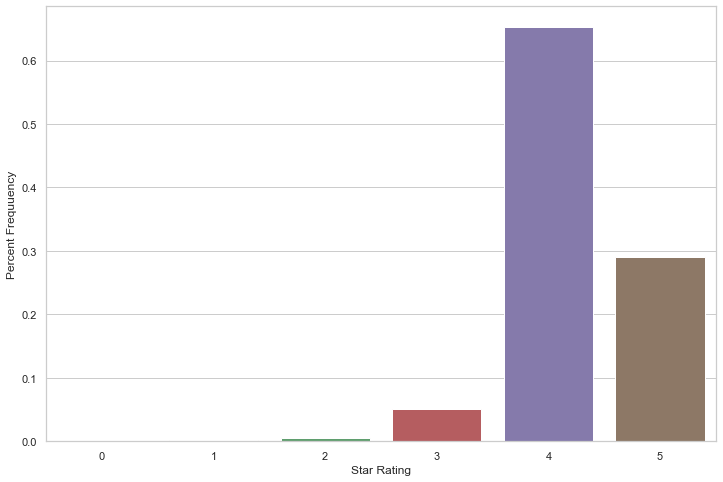

In [522]:
# plot with percentage instead of count
#sns.barplot(x='Id', y="Speed", data=df, order=result['Id'])

plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'Star Rating', y = 'percent', data=count_value)
ax.set(xlabel='Star Rating', ylabel='Percent Frequuency')

plt.show()

An average rating of 4 is the most common rating in this last 30 days of the  dataset. Customer reviews resemble the essential social proof required for customers to see if a book is worth their time and money. A book can have a 5-star rating, but a prospective customer will think it’s too good to be true. Around 65% of books are rated with an average rating of 4.To confirm the authenticity of the score, they will look at the number of reviews for the listing.


In [406]:
#Remove $ sign from each value in Price column
rank_df['Price'] = rank_df['Price'].astype(str).str.replace('$', '')

In [407]:
rank_df.head()

,Title,Price,Star,Rating,Genre,Category,Badge,Rank,Stars
81,Greenlights,30.00,4.7 out of 5 stars,821,in Rich and Famous Biographies,Biography,Best Seller,1,4.7
34,The Deep End (Diary of a Wimpy Kid Book 15),9.46,4.9 out of 5 stars,784,Children's Humor,Children,Best Seller,2,4.9
53,Modern Comfort Food: A Barefoot Contessa Cookbook,21.00,4.8 out of 5 stars,"1,317",in Comfort Food Cooking,Food,Best Seller,5,4.8
77,Untamed,27.00,4.7 out of 5 stars,"21,697",in Women Biographies,Biography,Best Seller,13,4.7
142,The Sentinel: A Jack Reacher Novel,14.99,4.1 out of 5 stars,703,Crime Action & Adventure,Thriller & Suspense,Best Seller,18,4.1


In [439]:
# 1. Which books got the max star rating ? 
boolean_condition = dfbook1.Badge == "Empty"
column_name = "Badge"
new_value = "NotBestSeller"

dfbook1.loc[boolean_condition, column_name] = new_value

In [440]:
boolean_condition = dfbook1.Badge == "Holiday Gift Guide"
column_name = "Badge"
new_value = "NotBestSeller"

dfbook1.loc[boolean_condition, column_name] = new_value

In [441]:
boolean_condition = dfbook1.Badge == "Kids Gift Guide"
column_name = "Badge"
new_value = "NotBestSeller"

dfbook1.loc[boolean_condition, column_name] = new_value

In [442]:
boolean_condition = dfbook1.Badge == "Amazon Charts"
column_name = "Badge"
new_value = "Best Seller"

dfbook1.loc[boolean_condition, column_name] = new_value

In [450]:
# 1. Which books got the max star rating ? 

top = dfbook1[ dfbook1['Rating'].notna()]
top = top[top['Rating'] != "Empty"]
top['Rating'] = top['Rating'].str.replace(',','')
top["Rating"] = top["Rating"].astype(str).astype(int)
df = top.sort_values('Rating', ascending=False).head(10)
df

# result = top[top['Rating'] == max(dfbook['Rating'])]
# result
# dfbook["Rating"]= dfbook["Rating"].astype(str).astype(int)
# #dfbook['Rating'] = dfbook['Rating'].str.replace(',','')

# dfbook[dfbook['Rating'] == max(dfbook['Rating'])]


,Title,Price,Star,Rating,Genre,Category,Publisher,Badge,Url
713,Untamed,$27.00,4.7 out of 5 stars,21697,in Women Biographies,Biography,NaN,Best Seller,NaN
572,Me,$19.99,4.8 out of 5 stars,10836,in Dancer Biographies,Biography,NaN,NotBestSeller,NaN
1034,Roommaid: A Novel,$0.00,4.3 out of 5 stars,7942,in Clean & Wholesome Romance,Fantasy,NaN,Best Seller,NaN
817,The Night Fire (RenÃ©e Ballard Book 3),$10.99,4.6 out of 5 stars,7883,in Women's Fiction,Fantasy,NaN,NotBestSeller,NaN
896,Walk the Wire (Memory Man Book 6),$11.99,4.5 out of 5 stars,7699,in Crime & Action,Thriller & Suspense,NaN,NotBestSeller,NaN
1077,The Unspoken: An Ashe Cayne Novel,$0.00,4.2 out of 5 stars,6932,"in African American Mystery, Thriller & Suspen...",Thriller & Suspense,NaN,Best Seller,NaN
714,The 19th Christmas (Women's Murder Club),$11.99,4.7 out of 5 stars,6199,in Holiday Fiction,Fantasy,NaN,NotBestSeller,NaN
715,"The Rise of Magicks: Chronicles of The One, Bo...",$9.99,4.7 out of 5 stars,5412,in Science Fiction & Fantasy,Fantasy,NaN,NotBestSeller,NaN
716,The Eye of the World: Book One of The Wheel of...,$0.00,4.7 out of 5 stars,5313,in Military Fantasy,Fantasy,NaN,NotBestSeller,NaN
897,Devoted,$0.00,4.5 out of 5 stars,5271,in Mystery Action & Adventure,Thriller & Suspense,NaN,NotBestSeller,NaN


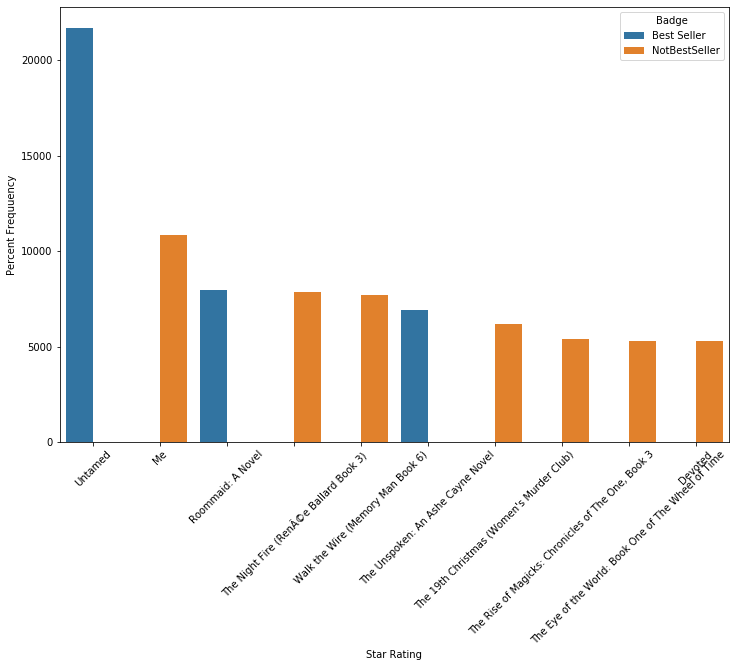

In [456]:
#Plot 

plt.figure(figsize=(12,8))
ax = sns.barplot(x = 'Title', y = 'Rating', data=df, hue = 'Badge')
ax.set(xlabel='Star Rating', ylabel='Percent Frequuency')
plt.xticks(rotation=45)
plt.show()






In [523]:
dfbook1['Category'].value_counts()

Food                   31
Children               24
Fantasy                22
Thriller & Suspense    21
Reference              16
Biography              13
Travel & Places         7
Politics                7
Science                 1
Name: Category, dtype: int64

In [537]:
dfbook1.dtypes

Title         object
Price         object
Star          object
Rating       float64
Genre         object
Category      object
Badge         object
Stars        float64
Starbin     category
dtype: object

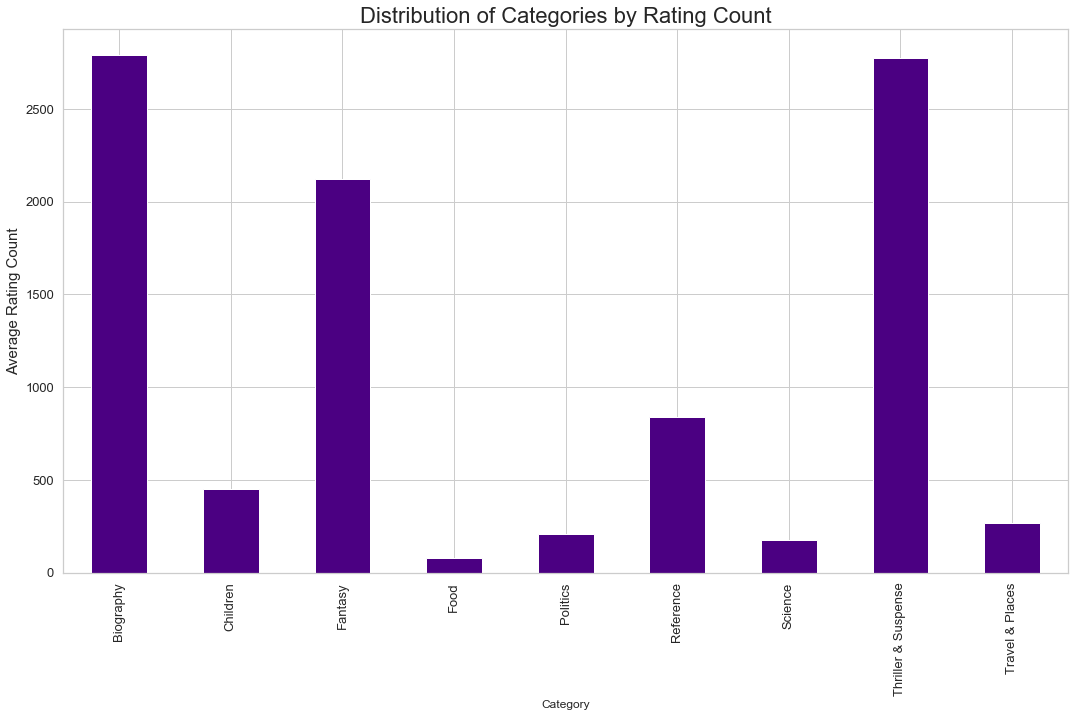

In [550]:
# WHich type of Category has sold a lot ?

df = dfbook1.groupby(['Category'])['Rating'].mean()

#df.plot.bar()

ax = df.plot(kind='bar', figsize=(18,10), color="indigo", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Distribution of Categories by Rating Count", fontsize=22)
ax.set_ylabel("Average Rating Count", fontsize=15);
plt.show()


We can observe from the plot that two categories are most popular in the this dataset. Biography and Thrillers followed by Fantasy, rest have less chance to be picked up the potential customer. 

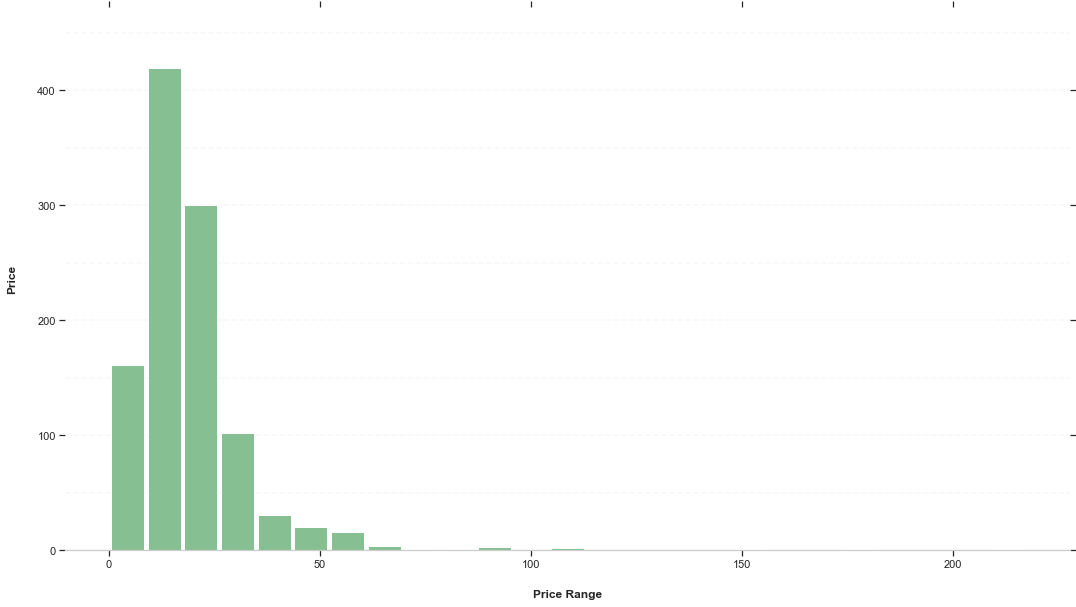

In [552]:
# 6. What is the price range, that is most present in the top 100 ?
# plot histogram


ax = dfbook1.hist(column='Price', bins=25, grid=False, figsize=(18,10), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Price Range", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Price", labelpad=20, weight='bold', size=12)


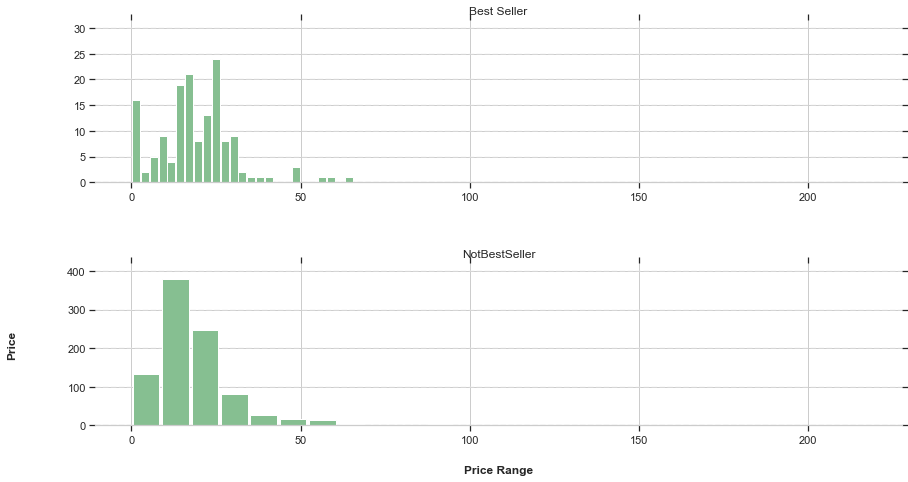

In [556]:
from matplotlib.ticker import StrMethodFormatter

ax = dfbook1.hist(column='Price', by='Badge', bins=25, grid=False, figsize=(14,12), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Price Range", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Price", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    x.tick_params(axis='x', rotation=0)



In [419]:
dfbook.head()

,Title,Price,Star,Rating,Genre,Category,Badge,Stars,Starbin
138,Dessert Person: Recipes and Guidance for Bakin...,21.00,5.0 out of 5 stars,152,in Dessert Baking,Food,NotBestSeller,5.0,5
139,How May I Offend You Today?: Rants and Revelat...,16.99,5.0 out of 5 stars,133,in Religious Humor,NaN,Best Seller,5.0,5
140,Harry Potter and the Sorcerer's Stone: MinaLim...,23.77,5.0 out of 5 stars,131,in Travel Photography,Travel & Places,NotBestSeller,5.0,5
141,Honest Advent: Awakening to the Wonder of God-...,17.09,5.0 out of 5 stars,110,Empty,NaN,NotBestSeller,5.0,5
142,Clean Paleo One-Pot Meals: 100 Delicious Recip...,20.47,5.0 out of 5 stars,107,Empty,NaN,NotBestSeller,5.0,5


In [541]:
dfbook1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 138 to 1200
Data columns (total 9 columns):
Title       1062 non-null object
Price       1063 non-null object
Star        1063 non-null object
Rating      1062 non-null float64
Genre       1062 non-null object
Category    142 non-null object
Badge       1062 non-null object
Stars       1063 non-null float64
Starbin     1063 non-null category
dtypes: category(1), float64(2), object(6)
memory usage: 76.0+ KB
